In [1]:
import sys

import torch

sys.path.append("..")


In [2]:
from data.dataloader import LowLightDataModule
from model.blocks.homomorphic import ImageComposition, ImageDecomposition
from utils.utils import show_batch, summarize_model


In [3]:
data_module = LowLightDataModule(
    train_dir="./data/1_train",
    valid_dir="./data/2_valid",
    bench_dir="./data/3_bench",
    infer_dir="./data/4_infer",
    image_size=512,
    batch_size=1,
    num_workers=4,
)

data_module.setup(stage="fit")


In [4]:
train_dataloader = data_module.train_dataloader()


torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


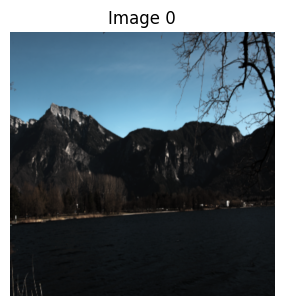

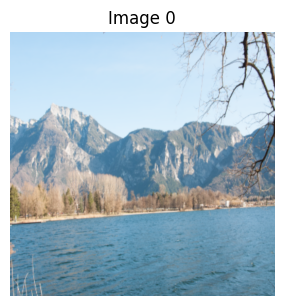

In [5]:
train_low, train_high = next(iter(train_dataloader))
print(train_low.shape)
print(train_high.shape)
show_batch(images=train_low)
show_batch(images=train_high)


In [6]:
decompose = ImageDecomposition(offset=0.5, raw_cutoff=0.1, trainable=False)
compose = ImageComposition(offset=0.5, trainable=False)


In [7]:
train_low = train_low.cuda()
train_high = train_high.cuda()
decompose = decompose.cuda()
compose = compose.cuda()


In [8]:
luminance, chroma_red, chroma_blue, illuminance, reflectance = decompose(train_low)
rgb, lu = compose(chroma_red, chroma_blue, illuminance, reflectance)


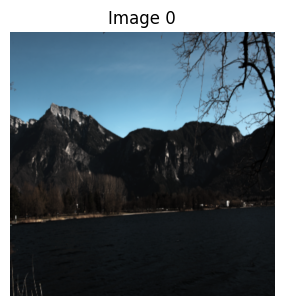

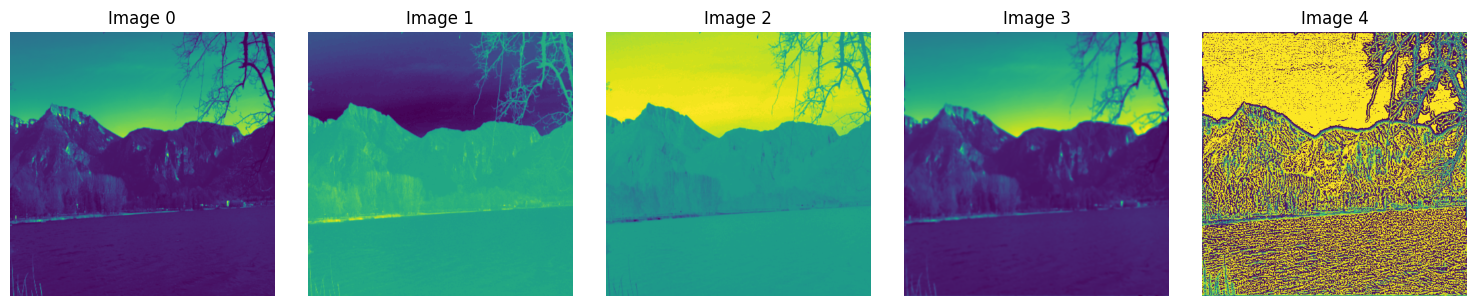

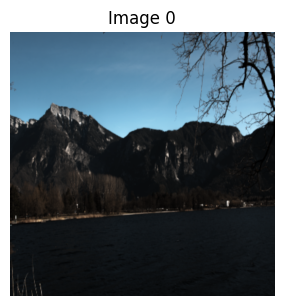

In [9]:
show_batch(images=train_low)
show_batch(
    images=torch.cat(
        tensors=[luminance, chroma_red, chroma_blue, illuminance, reflectance], dim=0
    )
)
show_batch(images=rgb)


In [10]:
import torchvision.utils as vutils

low_image = [train_low, luminance, chroma_red, chroma_blue, illuminance, reflectance]
low_str = [
    "train_low",
    "luminance",
    "chroma_red",
    "chroma_blue",
    "illuminance",
    "reflectance",
]
for img, str in zip(low_image, low_str):
    vutils.save_image(img, f"low_{str}.png")

print("이미지가 성공적으로 저장되었습니다.")


이미지가 성공적으로 저장되었습니다.


In [11]:
luminance, chroma_red, chroma_blue, illuminance, reflectance = decompose(train_high)
rgb, lu = compose(chroma_red, chroma_blue, illuminance, reflectance)


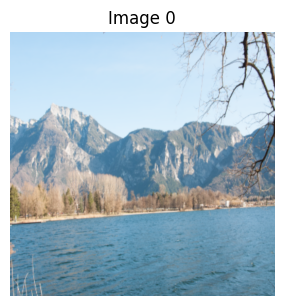

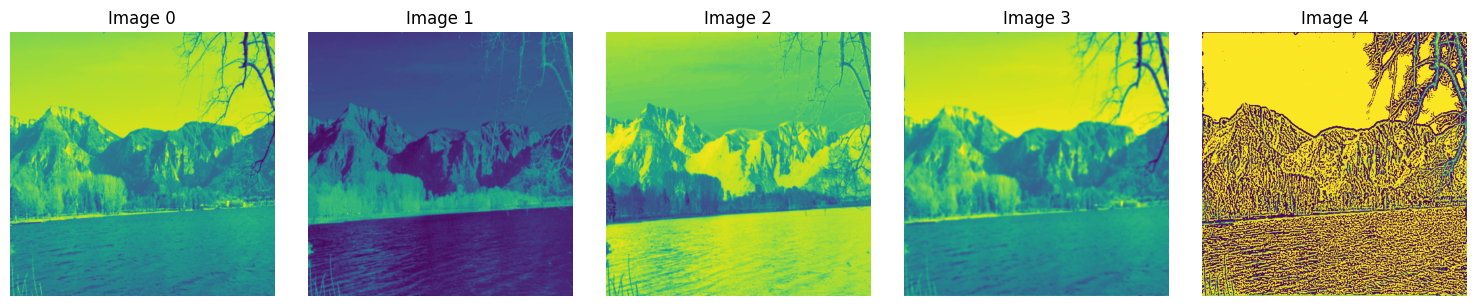

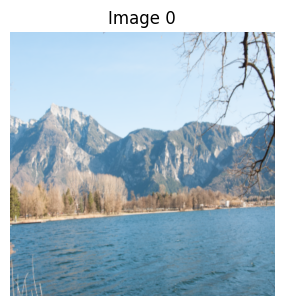

In [12]:
show_batch(images=train_high)
show_batch(
    images=torch.cat(
        tensors=[luminance, chroma_red, chroma_blue, illuminance, reflectance], dim=0
    )
)
show_batch(images=rgb)


In [13]:
import torchvision.utils as vutils

low_image = [train_high, luminance, chroma_red, chroma_blue, illuminance, reflectance]
low_str = [
    "train_high",
    "luminance",
    "chroma_red",
    "chroma_blue",
    "illuminance",
    "reflectance",
]
for img, str in zip(low_image, low_str):
    vutils.save_image(img, f"high_{str}.png")

print("이미지가 성공적으로 저장되었습니다.")


이미지가 성공적으로 저장되었습니다.
